In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("~/projects/intern/unsupervisedlearning/data/medical_students_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [4]:
df.isnull().sum()/df.shape[0] * 100

Student ID        10.0
Age               10.0
Gender            10.0
Height            10.0
Weight            10.0
Blood Type        10.0
BMI               10.0
Temperature       10.0
Heart Rate        10.0
Blood Pressure    10.0
Cholesterol       10.0
Diabetes          10.0
Smoking           10.0
dtype: float64

In [5]:
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [6]:
# Check if there is duplicates
len((df.duplicated() == False))

200000

In [7]:
# It seams like we won't need the Student ID feature in our model so we can remove it
df.drop("Student ID", axis=1, inplace=True)

In [8]:
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [9]:
# We need to understand data statistically
df.describe()

,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,26.021561,174.947103,69.971585,23.338869,98.600948,79.503767,114.558033,184.486361
std,4.890528,14.447560,17.322574,7.033554,0.500530,11.540755,14.403353,37.559678
min,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,22.000000,162.476110,54.969838,17.858396,98.264750,70.000000,102.000000,152.000000
50%,26.000000,174.899914,69.979384,22.671401,98.599654,80.000000,115.000000,184.000000
75%,30.000000,187.464417,84.980097,27.997487,98.940543,90.000000,127.000000,217.000000
max,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


In [10]:
# We need to understand categorical data
df.describe(include=['object'])

,Gender,Blood Type,Diabetes,Smoking
count,180000,180000,180000,180000
unique,2,4,2,2
top,Male,B,No,No
freq,90005,45537,161986,143971


In [11]:
df = df.dropna(thresh=int(df.shape[1] * (1 - 0.5)))

In [12]:
# Fill the Diabetes columns nans with the mode of the data
df['Diabetes'] = df['Diabetes'].fillna(df['Diabetes'].mode()[0])

In [13]:
# Fill the Smoking column nans with the mode of the data
df['Smoking'] = df['Smoking'].fillna(df['Smoking'].mode()[0])

In [14]:
df.sample(5)

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
151926,23.0,Male,150.617549,86.141502,B,37.971809,98.263008,88.0,NaN,225.0,No,No
112388,27.0,Male,187.471755,78.860589,AB,22.438216,98.906991,79.0,107.0,243.0,Yes,No
38359,20.0,Female,184.268125,42.702255,B,12.576227,98.525667,NaN,131.0,196.0,No,No
63053,27.0,Female,197.053450,66.305771,NaN,17.075886,99.442735,83.0,110.0,123.0,No,No
41626,23.0,Male,176.677952,48.760419,O,15.620780,98.249776,74.0,105.0,143.0,No,No


In [15]:
# As the std in the Temperature is just 0.5 degrees it's safe to just fill the nan values with the mean of the feature
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())

In [16]:
# We can fill the height column by getting the mode of the height based on gender, if gender is not available then just make it the mean
df['Height'] = df['Height'].fillna(df.groupby('Gender')['Height'].transform(lambda x: x.mode()[0]))
df['Height'] = df['Height'].fillna(df['Height'].mean())

In [17]:
# Do the same for the weight
df['Weight'] = df['Weight'].fillna(df.groupby('Gender')['Weight'].transform(lambda x: x.mode()[0]))
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

In [18]:
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,Female,161.777924,72.354947,O,27.645835,98.600943,95.0,109.0,203.0,No,No
1,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,23.0,Female,150.000329,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [19]:
df.isnull().sum()/df.shape[0] * 100

Age               9.9980
Gender            9.9960
Height            0.0000
Weight            0.0000
Blood Type        9.9965
BMI               9.9980
Temperature       0.0000
Heart Rate        9.9980
Blood Pressure    9.9975
Cholesterol       9.9975
Diabetes          0.0000
Smoking           0.0000
dtype: float64

In [20]:
# We need to encode the categorical data
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Smoking'] = encoder.fit_transform(df['Smoking'].astype(str))
df['Gender'] = encoder.fit_transform(df['Gender'].astype(str))
df['Diabetes'] = encoder.fit_transform(df['Diabetes'].astype(str))


In [21]:
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,0,161.777924,72.354947,O,27.645835,98.600943,95.0,109.0,203.0,0,0
1,NaN,1,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,0,0
2,32.0,0,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,1,0
3,30.0,1,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,0,1
4,23.0,0,150.000329,46.234173,O,NaN,98.480008,95.0,NaN,231.0,0,0


In [22]:
df.isnull().sum()/df.shape[0] * 100

Age               9.9980
Gender            0.0000
Height            0.0000
Weight            0.0000
Blood Type        9.9965
BMI               9.9980
Temperature       0.0000
Heart Rate        9.9980
Blood Pressure    9.9975
Cholesterol       9.9975
Diabetes          0.0000
Smoking           0.0000
dtype: float64

In [23]:
# We will fill the Blood pressure, cholesterol with the mode of the data
df['Blood Pressure'] = df['Blood Pressure'].fillna(df['Blood Pressure'].mode()[0])
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].mode()[0])
df['Heart Rate'] = df['Heart Rate'].fillna(df['Heart Rate'].mode()[0])

In [24]:
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,0,161.777924,72.354947,O,27.645835,98.600943,95.0,109.0,203.0,0,0
1,NaN,1,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,0,0
2,32.0,0,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,1,0
3,30.0,1,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,0,1
4,23.0,0,150.000329,46.234173,O,NaN,98.480008,95.0,106.0,231.0,0,0


In [25]:
# We will fill the nan blood types with random sampling
value_counts = df['Blood Type'].dropna().value_counts(normalize=True)
blood_types = value_counts.index.tolist()
probabilities = value_counts.values.tolist()

mask = df['Blood Type'].isna()
n_missing = mask.sum()
imputed_values = np.random.choice(blood_types, size=n_missing, p=probabilities)
df.loc[mask, 'Blood Type'] = imputed_values

In [26]:
df.isnull().sum()/df.shape[0] * 100

Age               9.998
Gender            0.000
Height            0.000
Weight            0.000
Blood Type        0.000
BMI               9.998
Temperature       0.000
Heart Rate        0.000
Blood Pressure    0.000
Cholesterol       0.000
Diabetes          0.000
Smoking           0.000
dtype: float64

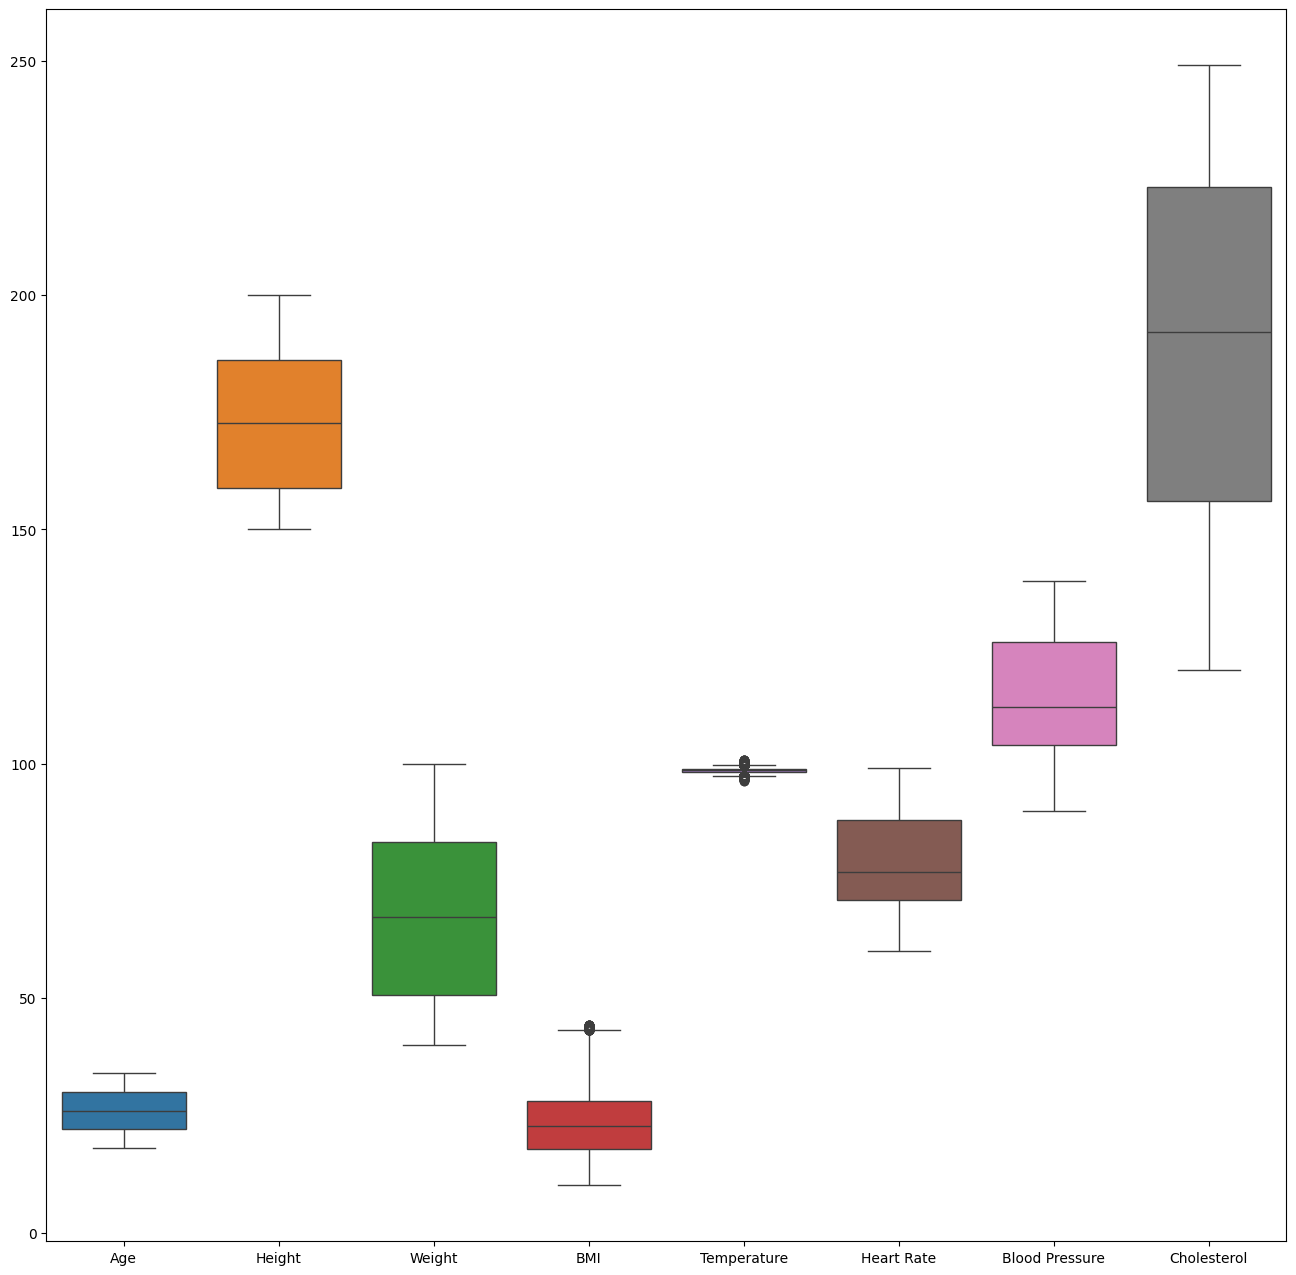

In [27]:
# Now We need to find the outliers in the numerical features
cols = df.select_dtypes(include=['float64'])

plt.figure(figsize=(16, 16))
sns.boxplot(cols)
plt.show()

In [28]:
# Now we need to make a clipping to the BMI and Temperature columns to remove outliers
def clip_outliers(*features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df[feature] = df[feature].clip(lower=lower, upper=upper)

clip_outliers('BMI', 'Temperature')

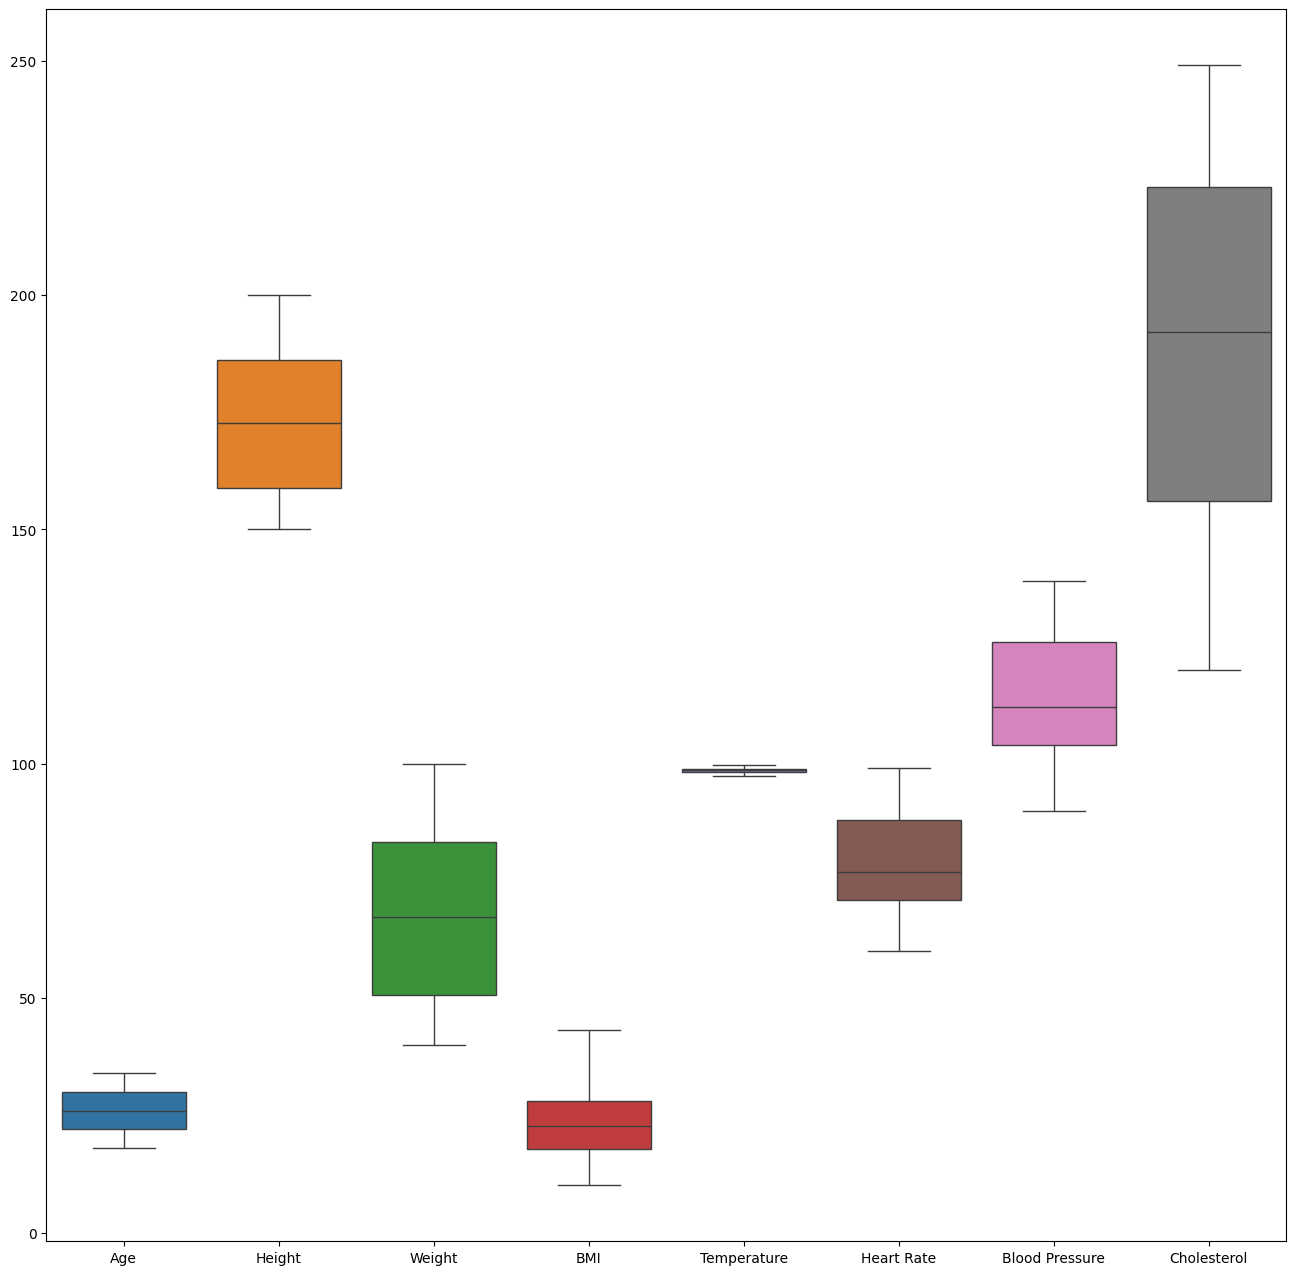

In [29]:
cols = df.select_dtypes(include=['float64'])
plt.figure(figsize=(16, 16))
sns.boxplot(cols)
plt.show()

In [30]:
# Now we need to Scale the numerical features that we made the preprocessing on
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = df.select_dtypes(include=['float64']).columns

for feature in features:
    if feature != "BMI" and feature != "Age":
        df[feature] = scaler.fit_transform(df[[feature]])


In [31]:
df.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,0,-0.704796,0.275318,O,27.645835,0.000228,1.434849,-0.338225,0.391454,0,0
1,NaN,1,-1.332888,-1.058870,B,NaN,0.244509,1.252605,-0.697851,-0.676389,0,0
2,32.0,0,0.638218,-0.621221,A,16.729017,-0.729502,-0.296467,1.172205,0.738503,1,0
3,30.0,1,0.610737,-0.211579,B,19.096042,0.511483,1.799337,-0.122449,-1.263702,0,1
4,23.0,0,-1.466727,-1.134245,O,NaN,-0.258835,1.434849,-0.554001,1.138944,0,0


In [32]:
# We need to Encode the Blood Type
df = pd.get_dummies(df, columns=['Blood Type'], prefix='blood').replace({True: 1, False: 0})


/tmp/ipykernel_26466/3807954605.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = pd.get_dummies(df, columns=['Blood Type'], prefix='blood').replace({True: 1, False: 0})


In [33]:
# Now we can Fill the BMI values based on doing linear regression on other columns
known_bmi = df[df['BMI'].notna()]
unknown_bmi = df[df['BMI'].isna()]

X_train = known_bmi.drop(['Age', 'BMI'], axis=1)
y_train = known_bmi['BMI']
X_test = unknown_bmi.drop(['Age', 'BMI'], axis=1)


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

predicted_bmi = model.predict(X_test)

df.loc[df['BMI'].isna(), 'BMI'] = predicted_bmi

In [34]:
df.head()

,Age,Gender,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking,blood_A,blood_AB,blood_B,blood_O
0,18.0,0,-0.704796,0.275318,27.645835,0.000228,1.434849,-0.338225,0.391454,0,0,0,0,0,1
1,NaN,1,-1.332888,-1.058870,22.506350,0.244509,1.252605,-0.697851,-0.676389,0,0,0,0,1,0
2,32.0,0,0.638218,-0.621221,16.729017,-0.729502,-0.296467,1.172205,0.738503,1,0,1,0,0,0
3,30.0,1,0.610737,-0.211579,19.096042,0.511483,1.799337,-0.122449,-1.263702,0,1,0,0,1,0
4,23.0,0,-1.466727,-1.134245,22.628650,-0.258835,1.434849,-0.554001,1.138944,0,0,0,0,0,1


In [35]:
# Scale the BMI value and then predict the nan age entries
df['BMI'] = scaler.fit_transform(df[['BMI']])

known_age = df[df['Age'].notna()]
unknown_age = df[df['Age'].isna()]

X_train = known_age.drop('Age', axis=1).to_numpy()
y_train = known_age[['Age']]
X_test = unknown_age.drop('Age', axis=1).to_numpy()

model.fit(X_train, y_train)

predicted_age = model.predict(X_test)

df.loc[df['Age'].isna(), 'Age'] = predicted_age

df['Age'] = scaler.fit_transform(df[['Age']])

In [36]:
df.head()

,Age,Gender,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking,blood_A,blood_AB,blood_B,blood_O
0,-1.728905,0,-0.704796,0.275318,0.622041,0.000228,1.434849,-0.338225,0.391454,0,0,0,0,0,1
1,-0.002441,1,-1.332888,-1.058870,-0.120458,0.244509,1.252605,-0.697851,-0.676389,0,0,0,0,1,0
2,1.288570,0,0.638218,-0.621221,-0.955107,-0.729502,-0.296467,1.172205,0.738503,1,0,1,0,0,0
3,0.857502,1,0.610737,-0.211579,-0.613144,0.511483,1.799337,-0.122449,-1.263702,0,1,0,0,1,0
4,-0.651235,0,-1.466727,-1.134245,-0.102790,-0.258835,1.434849,-0.554001,1.138944,0,0,0,0,0,1


In [37]:
# Now we need to do PCA to reduce the Dimensionallity of the data to 3D
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

data = pca.fit_transform(df)

In [38]:
data

array([[ 0.8597783 ,  0.34168158, -1.0089723 ],
       [-0.18472801, -0.65084477,  0.3194231 ],
       [-1.28974663,  0.97376605, -0.01346547],
       ...,
       [ 2.6303977 , -1.82994574,  1.95320412],
       [-0.40908234, -1.78884904,  0.63720753],
       [ 3.42849647,  0.61582374, -1.31475012]])

In [43]:
# Now we need to Make Clustering to those students to two clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)

kmeans.fit(data)

KMeans(n_clusters=6, random_state=42)

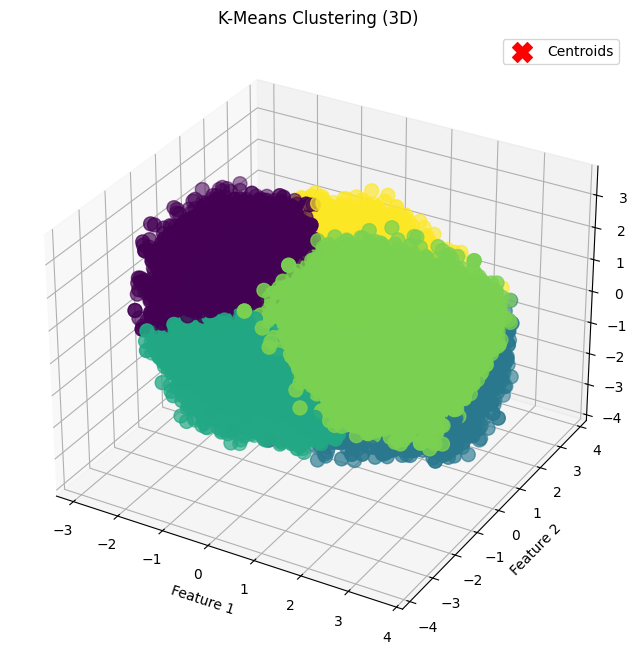

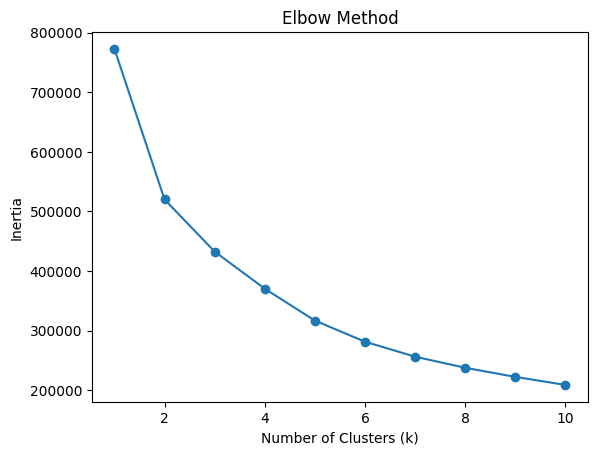

In [44]:
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster colors
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', s=100)

# Plot the cluster centers
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], 
           s=200, c='red', marker='X', label='Centroids')

# Labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('K-Means Clustering (3D)')
ax.legend()

# Show plot
plt.show()

# Elbow method to determine optimal k
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
